In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
sys.path.insert(0, "../func_py/")
import data_utils as ut

In [3]:
min_n_reads = 3

To run Hilary it's faster to have the alignemnt output of change O. Here we filter the mixcr output by selecting a minimum number of reads per sequence and we create a fasta to feed the aligner of change O. 
We keep the information on the C alignment, that will be lost on the trimmed sequence.

## Visualizing one sample

In [ ]:
sample_name = "1.clones_IGH.tsv"
fr = pd.read_csv('mixcr_out/'+sample_name, sep='\t')
len(fr)

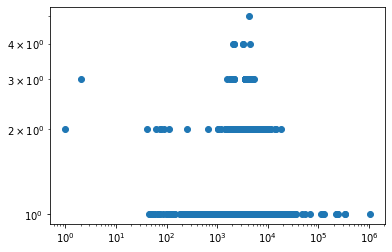

In [60]:
uni_n, count_n = np.unique(fr.readCount, return_counts=True)
plt.loglog()
plt.scatter(uni_n, count_n)

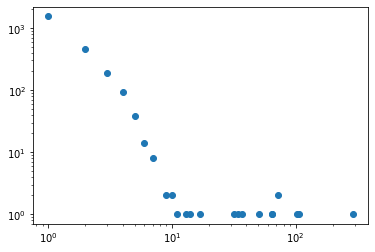

In [61]:
ns = fr.uniqueMoleculeCount[fr.readCount > 1]
uni_n, count_n = np.unique(ns, return_counts=True)
plt.loglog()
plt.scatter(uni_n, count_n)

## Processing and exporting the fasta for every sample

In [62]:
c_call = fr.allCHitsWithScore.str.split('*').str[0]
c_call = c_call.fillna("")
np.unique(np.array(c_call.values))

array(['', 'IGHA1', 'IGHD', 'IGHG1', 'IGHG3', 'IGHM'], dtype=object)

In [63]:
def process(fr):
    fr = fr[fr.readCount >= min_n_reads]
    fr.loc[:,'cloneId'] = np.array(fr.cloneId, dtype=str)
    fr.loc[:,'uniqueMoleculeCount'] = np.array(fr.uniqueMoleculeCount, dtype=str)
    c_call = fr.allCHitsWithScore.str.split('*').str[0].fillna("")
    new_id = fr.cloneId + "|DUPCOUNT=" + fr.uniqueMoleculeCount + "|c_call=" + c_call
    fr.index = new_id
    return fr

def write_fasta(dictionary, path):
    file = open(path, 'w')
    for k, v in dictionary.items():
        file.write(">" + str(k) + "\n")
        file.write(str(v) + "\n")
    file.close()

In [64]:
for f_name in os.listdir('mixcr_out/'):
    if f_name[-4:] != '.tsv':
        continue
    if f_name[-7:-4] != 'IGH':
        continue
    print(f_name)
    
    fr = pd.read_csv('mixcr_out/'+f_name, sep='\t')
    fr = process(fr)
    _id = f_name.split('.')[0]
    write_fasta(fr.targetSequences, 'mixcr_out/' + _id + '_seqs.fasta')

25.clones_IGH.tsv
40.clones_IGH.tsv
61.clones_IGH.tsv
42.clones_IGH.tsv
65.clones_IGH.tsv
16.clones_IGH.tsv
6.clones_IGH.tsv
55.clones_IGH.tsv
71.clones_IGH.tsv
46.clones_IGH.tsv
64.clones_IGH.tsv
5.clones_IGH.tsv
49.clones_IGH.tsv
54.clones_IGH.tsv
10.clones_IGH.tsv
23.clones_IGH.tsv
78.clones_IGH.tsv
72.clones_IGH.tsv
56.clones_IGH.tsv
36.clones_IGH.tsv
32.clones_IGH.tsv
8.clones_IGH.tsv
2.clones_IGH.tsv
35.clones_IGH.tsv
57.clones_IGH.tsv
51.clones_IGH.tsv
37.clones_IGH.tsv
18.clones_IGH.tsv
26.clones_IGH.tsv
17.clones_IGH.tsv
77.clones_IGH.tsv
79.clones_IGH.tsv
50.clones_IGH.tsv
1.clones_IGH.tsv
11.clones_IGH.tsv
74.clones_IGH.tsv
34.clones_IGH.tsv
41.clones_IGH.tsv
80.clones_IGH.tsv
31.clones_IGH.tsv
48.clones_IGH.tsv
45.clones_IGH.tsv
39.clones_IGH.tsv
66.clones_IGH.tsv
67.clones_IGH.tsv
19.clones_IGH.tsv
24.clones_IGH.tsv
22.clones_IGH.tsv
72_chunk_1.clones_IGH.tsv
63.clones_IGH.tsv
4.clones_IGH.tsv
73.clones_IGH.tsv
60.clones_IGH.tsv
9.clones_IGH.tsv
